NB: In this notebook person = body

### Import and parameters

In [1]:
dataset = "val" # train, val or test

In [2]:
import numpy as np
import os
import tqdm
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

from utils.cocoset import CocoSet

%matplotlib inline

In [3]:
# Init CocoSet

from utils.cocoset import CocoSet
%matplotlib inline

image_path = "homemade/coco_body_head/images/{}2017/".format(dataset)

coco_set = CocoSet(image_path)

files = list()
files.append("coco/annotations/person_keypoints_{}2017.json".format(dataset))
files.append("coco/annotations/captions_{}2017.json".format(dataset))
files.append("coco/annotations/instances_{}2017.json".format(dataset))

coco_set.load_coco(files)

head_path_fmt = 'homemade/coco_head/{}2017'

### coco/annotations/person_keypoints_val2017.json
Keys:  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Annotations: dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])
Images: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']) 

### coco/annotations/captions_val2017.json
Keys:  dict_keys(['info', 'licenses', 'images', 'annotations'])
Annotations: dict_keys(['image_id', 'id', 'caption'])
Images: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']) 

### coco/annotations/instances_val2017.json
Keys:  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
Annotations: dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
Images: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']) 



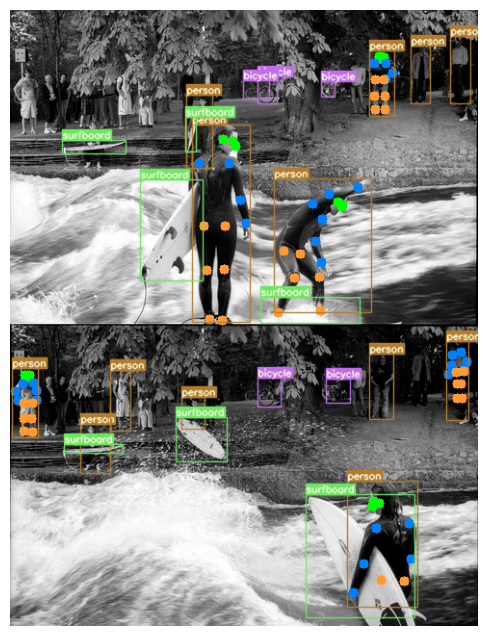

In [4]:
if dataset == "val":
    coco_set.print_image(59635, display_seg=False, display_kp=True)

In [5]:
animal_ids = coco_set.get_super_category_ids('animal')
print("Animal ids:", animal_ids)

Animal ids: [16 17 18 19 20 21 22 23 24 25]


### General functions

In [6]:
def id_to_orientation(category_id):
    name = coco_set.get_category(category_id=category_id)['name'].split("_")
    if len(name) > 1:
        return name[1]
    else:
        return 'unknow'

### Body orientation: Front / Back

In [7]:
# Add 4 new categories: person_front, person_back, person_right, person_left

import copy

person_category = coco_set.get_category(1)

person_front = copy.deepcopy(person_category)
person_front['name'] = 'person_front'
coco_set.add_category(person_front)

person_back = copy.deepcopy(person_category)
person_back['name'] = 'person_back'
coco_set.add_category(person_back)

person_back = copy.deepcopy(person_category)
person_back['name'] = 'person_right'
coco_set.add_category(person_back)

person_back = copy.deepcopy(person_category)
person_back['name'] = 'person_left'
coco_set.add_category(person_back)

person_dic = {id_to_orientation(person_id): person_id for person_id in coco_set.get_super_category_ids('person')}

print(person_dic)

person_ids = coco_set.get_super_category_ids('person')
print("Person ids:", person_ids)

Category "person_front" added with id 91
Category "person_back" added with id 92
Category "person_right" added with id 93
Category "person_left" added with id 94
{'unknow': 1, 'front': 91, 'back': 92, 'right': 93, 'left': 94}
Person ids: [ 1 91 92 93 94]


In [8]:
# Body orientation: Define body part priority

keypoint_list = coco_set.params["categories"][0]['keypoints']
print(keypoint_list)
priority = ["shoulder", "elbow", "hip", "knee", "ankle"] # "eye", "ear", "wrist"
print(priority)

['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']
['shoulder', 'elbow', 'hip', 'knee', 'ankle']


In [9]:
# Body orientation: Front and Back
            
for image_id, image_dic in coco_set.dic.items():
    for ann in image_dic.get('annotations', []):
        if ann.get('category_id', 0) == 1 and 'keypoints' in ann:
            dic = coco_set.get_keypoint_dic(ann['keypoints'])
            for p in priority:
                left = dic["left_{}".format(p)]
                right = dic["right_{}".format(p)]
                if left[2] > 0 and right[2] > 0:
                    if right[0] < left[0]:
                        ann['category_id'] = person_dic['front']
                    else:
                        ann['category_id'] = person_dic['back']
                    break

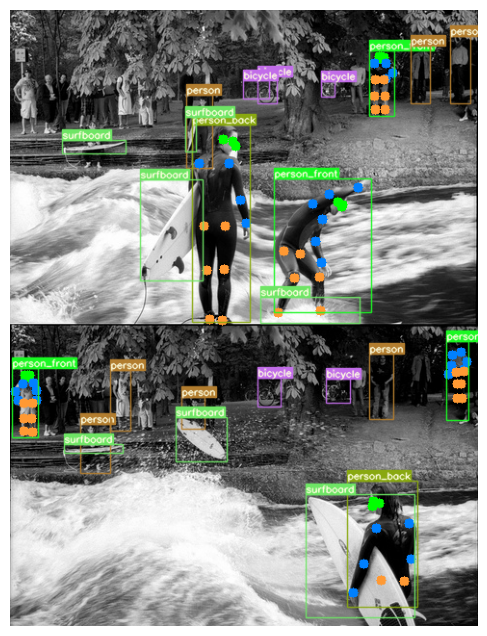

In [10]:
if dataset == "val":
    coco_set.print_image(59635, display_seg=False, display_kp=True)

### Head Orientation: Front / Back / Left / Right

In [11]:
# Add 4 new categories: head_front, head_back, head_right, head_left

import copy

person_category = coco_set.get_category(1)

person_head = copy.deepcopy(person_category)
person_head['supercategory'] = 'head'
person_head.pop('keypoints')
person_head.pop('skeleton')
person_head['name'] = 'head'
coco_set.add_category(person_head)

person_head_front = copy.deepcopy(person_head)
person_head_front['name'] = 'head_front'
coco_set.add_category(person_head_front)

person_head_back = copy.deepcopy(person_head)
person_head_back['name'] = 'head_back'
coco_set.add_category(person_head_back)

person_head_right = copy.deepcopy(person_head)
person_head_right['name'] = 'head_right'
coco_set.add_category(person_head_right)

person_head_left = copy.deepcopy(person_head)
person_head_left['name'] = 'head_left'
coco_set.add_category(person_head_left)

head_dic = {id_to_orientation(head_id): head_id for head_id in coco_set.get_super_category_ids('head')}

print(head_dic)

head_ids = coco_set.get_super_category_ids('head')
print("Head ids:", head_ids)

Category "head" added with id 95
Category "head_front" added with id 96
Category "head_back" added with id 97
Category "head_right" added with id 98
Category "head_left" added with id 99
{'unknow': 95, 'front': 96, 'back': 97, 'right': 98, 'left': 99}
Head ids: [95 96 97 98 99]


In [12]:
# Function for head / body matching

from scipy.optimize import linear_sum_assignment

def point_in_bbox(point, bbox):
    """ tests if point [x, y] in bounding box [x0, y0, size_x, size_y] """
    return bbox[0] <= point[0] <= bbox[0] + bbox[2] and bbox[1] <= point[1] <= bbox[1] + bbox[3]

def bbox_kps_all_in(bbox, kp_dic):
    f = lambda x: point_in_bbox(np.array(kp_dic[x]), np.array(bbox))
    return f('right_eye') and f('left_eye') and f('right_ear') and f('left_ear') and f('nose') 

def bbox_kps_one_in(bbox, kp_dic):
    f = lambda x: point_in_bbox(np.array(kp_dic[x]), np.array(bbox))
    return f('right_eye') or f('left_eye') or f('right_ear') or f('left_ear') or f('nose') 

def bbox_perimeter(bbox):
    return (bbox[2] + bbox[3]) * 2 
    
def matching(heads, persons):
    if len(heads) == 0 or len(persons) == 0:
        return [], heads, persons
    
    matrix = np.array([[bbox_coco_area_ratio(head, person['bbox']) > 0.5
                        for person in persons] for head in heads]).astype(float)
    
    matrix += np.array([[bbox_kps_one_in(head, coco_set.get_keypoint_dic(person['keypoints'])) 
                        for person in persons] for head in heads]).astype(float)
    
    matrix += np.array([[bbox_kps_all_in(head, coco_set.get_keypoint_dic(person['keypoints']))
                        for person in persons] for head in heads]).astype(float)
    
    perimeter_weight = np.array([[bbox_perimeter(head) * bbox_perimeter(person['bbox'])
                                 for person in persons] for head in heads])
    
    perimeter_weight = perimeter_weight / (np.max(perimeter_weight) + 1)
    
    matrix += perimeter_weight
            
    lines, columns = linear_sum_assignment(-matrix)
    
    indexes = [[l, c] for l, c in zip(lines, columns) if matrix[l, c] >= 1]
        
    res = [(heads[l], persons[c]) for l, c in indexes]
            
    if len(indexes):
        indexes = np.array(indexes)
        heads = np.delete(heads, indexes[:, 0], axis=0)
        persons = np.delete(persons, indexes[:, 1], axis=0)
        
    return res, heads, persons

In [13]:
def segment_size(segment):
    """ returns size of segment [x0, y0, x1, y1] """
    return np.sqrt((segment[2] - segment[0]) ** 2 + (segment[3] - segment[1]) ** 2)

VISIBLE = 2
NOT_VISIBLE = 1
NO_LABEL = 0

OPPOSITE = {'left': 'right', 
            'right': 'left', 
            'front': 'back', 
            'back': 'front'}

person_dic_m = {person_id: id_to_orientation(person_id) for person_id in coco_set.get_super_category_ids('person')}
print(person_dic_m)

def get_head_orientation(body_dic, head, body_category):
    body_orientation = person_dic_m[body_category]
    
    orientation = head_orientation(dic, head)
    
    if orientation != "unknow" and OPPOSITE[orientation] == body_orientation:
        orientation = "unknow"
            
    return orientation
    
def head_orientation(dic, head):
    # No information, return 'unknow'
    if np.all([v[2] == NO_LABEL for v in dic.values()]):
        return 'unknow'
        
    # VISIBLE
    skip_eye_lr = False
    if (dic['right_eye'][2] == VISIBLE and dic['left_eye'][2] == VISIBLE):
        eye_distance = segment_size(np.array([*dic['right_eye'][:2], *dic['left_eye'][:2]]))
        if eye_distance * 8 >= head[2]:
            return 'front'
        else:
            skip_eye_lr = True
    
    if (dic['right_ear'][2] == VISIBLE and dic['left_ear'][2] == VISIBLE):
        if dic['right_ear'][0] < dic['left_ear'][0]:
            return 'front'
        else:
            return 'back'
    if dic['right_eye'][2] == VISIBLE and not skip_eye_lr:
        return 'right'
    if dic['left_eye'][2] == VISIBLE and not skip_eye_lr:
        return 'left'
    if dic['nose'][2] == VISIBLE and dic['right_ear'][2] == VISIBLE:
        return 'right'
    if dic['nose'][2] == VISIBLE and dic['left_ear'][2] == VISIBLE:
        return 'left'
    
    if (dic['right_ear'][2] == NOT_VISIBLE and dic['left_ear'][2] == NOT_VISIBLE):
        if dic['right_ear'][0] < dic['left_ear'][0]:
            return 'front'
        else:
            return 'back'
    
    return 'back' # 'unknow'

{1: 'unknow', 91: 'front', 92: 'back', 93: 'right', 94: 'left'}


In [14]:
from utils.cocoset import bbox_yolo_to_coco, bbox_coco_area_ratio

def bbox_in_bbox(bbox_in, bbox_out):
    """ checks if bbox_in in bbox_out"""
    res = (bbox_out[0] <= bbox_in[0] <= bbox_out[0] + bbox_out[2]
           and bbox_out[0] <= bbox_in[0] + bbox_in[2] <= bbox_out[0] + bbox_out[2]
           and bbox_out[1] <= bbox_in[1] <= bbox_out[1] + bbox_out[3]
           and bbox_out[1] <= bbox_in[1] + bbox_in[3] <= bbox_out[1] + bbox_out[3])
    return res

head_dir = Path(head_path_fmt.format(dataset))

body_without_heads = set()

for filename in tqdm.tqdm(list(head_dir.iterdir())):
    image_id = int(filename.stem)
    if image_id not in coco_set.dic:
        continue
    
    image_dic = coco_set.dic[image_id]
    
    width = image_dic['width']
    height = image_dic['height']
    
    with open(filename, 'r') as input_file:
        heads = list(filter(len, input_file.read().split("\n")))
    
    heads = np.array([bbox_yolo_to_coco([float(v) for v in l.split(" ")[1:5]], width, height) for l in heads])
    
    animals = np.array([ann for ann in image_dic['annotations'] if ann.get('category_id', -1) in animal_ids])
    
    persons = np.array([ann for ann in image_dic['annotations'] if ann.get('category_id', -1) in person_ids])

    # Remove false head detection (and some true detection) on animals
    # TODO: use semantic segmentation to avoid removing true detection around segmentation
    mask = np.ones(heads.shape[0], dtype=bool)
    
    for animal in animals:
        mask = np.logical_and(mask, [not bbox_in_bbox(head, animal['bbox']) for head in heads])
    
    if not np.all(mask):
        for person in persons:
            mask = np.logical_or(mask, [bbox_in_bbox(head, person['bbox']) for head in heads])
        heads = heads[mask]
    
    # Head / Body matching
    res, heads, persons = matching(heads, persons)
    
    
    # Generate head for boddy without head
    # NB: Currently remove: Few images are concerned and the results are not good, 
    # either in terms of size and location or in terms of labeling.
    if len(persons) > 0:
        body_without_heads.add(image_id)
    """
    for person in persons:
        dic = coco_set.get_keypoint_dic(person['keypoints'])
        head = get_head_bbox(dic)
        if head is not None:
            res.append((head, person))
            display = image_id
            print(image_id)
    """
    
    # Add body and head which matched
    for head, person in res:
        dic = coco_set.get_keypoint_dic(person['keypoints'])
        orientation = get_head_orientation(dic, head, person['category_id'])
        head_ann = {'image_id': image_id, 'bbox': list(head), 
                    'category_id': head_dic[orientation], 'id': coco_set.get_new_ann_id(), 
                    'person': person.get('id', -1)}
        person['head'] = head_ann.get('id', -1)
        coco_set.dic[image_id]['annotations'].append(head_ann)
        
    # Add head without boddy
    for head in heads:
        head_ann = {'image_id': image_id, 'bbox': list(head), 
                    'category_id': head_dic['unknow'], 'id': coco_set.get_new_ann_id()}
        coco_set.dic[image_id]['annotations'].append(head_ann)

# print("Images with person without head:", body_without_heads)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2629/2629 [00:02<00:00, 1050.06it/s]


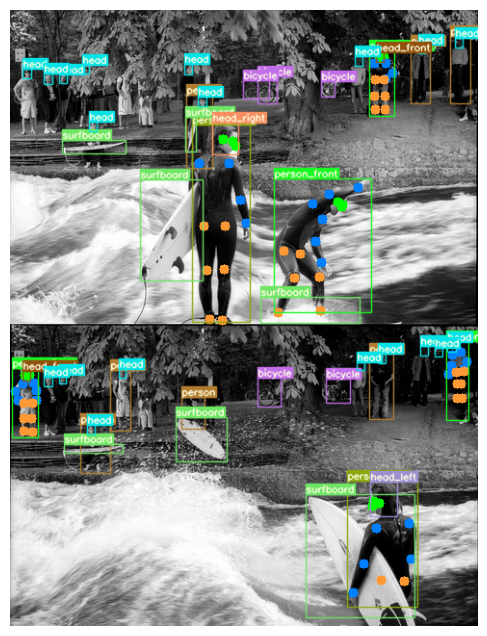

In [15]:
if dataset == "val":
    coco_set.print_image(59635, display_kp=True)

### Body Orientation: Left / Right

In [16]:
person_category = coco_set.get_category(category_name="person")

person_back = copy.deepcopy(person_category)
person_back['name'] = 'person_right'
coco_set.add_category(person_back)

person_back = copy.deepcopy(person_category)
person_back['name'] = 'person_left'
coco_set.add_category(person_back)

person_dic = {id_to_orientation(person_id): person_id for person_id in coco_set.get_super_category_ids('person')}
print(person_dic)

person_ids = coco_set.get_super_category_ids('person')
print("Person ids:", person_ids)

The name of the new category "person_right" is already in the dataset, add_category() canceled.
The name of the new category "person_left" is already in the dataset, add_category() canceled.
{'unknow': 1, 'front': 91, 'back': 92, 'right': 93, 'left': 94}
Person ids: [ 1 91 92 93 94]


In [17]:
# Body orientation left/right: Update CocoSet with update_section
head_dic_t = {v: k for k, v in head_dic.items()}

ids = set()
for image_id, image_dic in coco_set.dic.items():
    for ann in image_dic.get('annotations', []):
        if not ann.get('category_id', 0) in person_ids or 'keypoints' not in ann or 'head' not in ann:
            continue
        
        head_ann = next((a for a in image_dic.get('annotations', []) if a.get('id', -1) == ann['head']), None)
        if head_ann is None:
            continue
            
        dic = coco_set.get_keypoint_dic(ann['keypoints'])
        
        torso_width = 0
        if dic['left_shoulder'][2] > 0 or dic['right_shoulder'][2] > 0:
            torso_width = segment_size(np.array([dic['left_shoulder'][0], dic['left_shoulder'][1], 
                                                 dic['right_shoulder'][0], dic['right_shoulder'][1]]))
        elif dic['left_hip'][2] > 0 or dic['right_hip'][2] > 0:
            torso_width = segment_size(np.array([dic['left_hip'][0], dic['left_hip'][1], 
                                                 dic['right_hip'][0], dic['right_hip'][1]]))
        else:
            continue
        
        head_width = head_ann['bbox'][2]
        
        if head_width * 0.9 < torso_width:
            continue
            
        ids.add(image_id)
        
        if head_dic_t[head_ann['category_id']] == 'left':
            ann['category_id'] = person_dic['left']
        elif head_dic_t[head_ann['category_id']] == 'right':
            ann['category_id'] = person_dic['right']

In [18]:
print(list(ids)[:50])

[458755, 241668, 260106, 393226, 102411, 532493, 45070, 440336, 327701, 362520, 274460, 67616, 215072, 4134, 466986, 397354, 32817, 475191, 18491, 84031, 26690, 563267, 161861, 507975, 36936, 227399, 157767, 469067, 100428, 561223, 137294, 301135, 389197, 186449, 122962, 268378, 284764, 311394, 329827, 477288, 2153, 411754, 49259, 485480, 481390, 342128, 368752, 319607, 346232, 391290]


458755


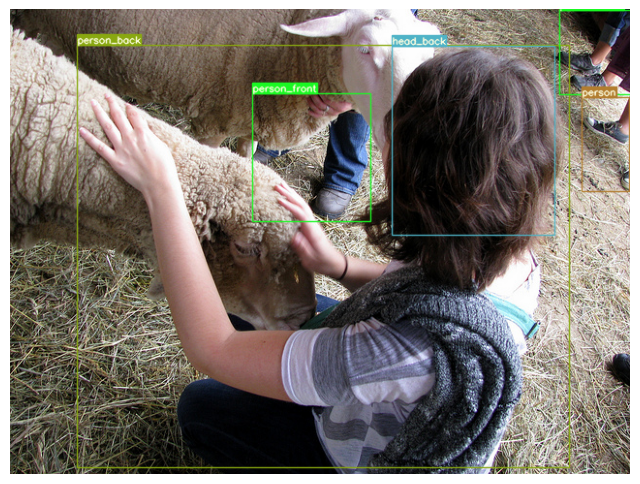

241668


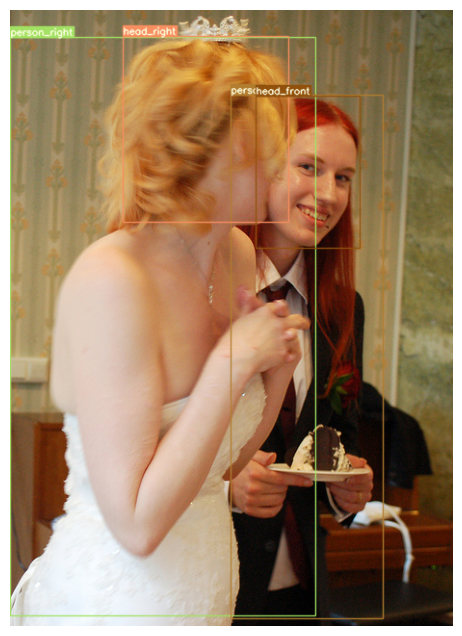

260106


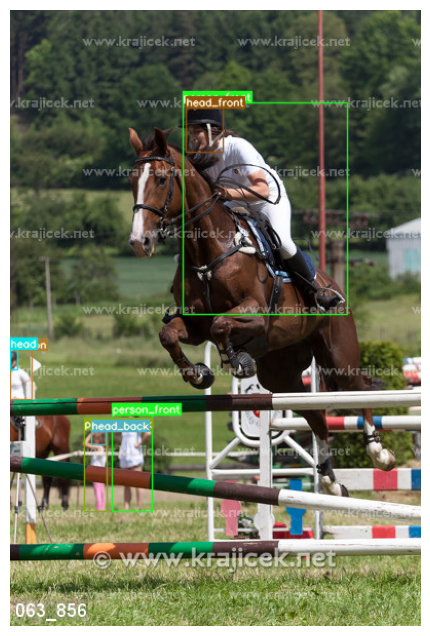

393226


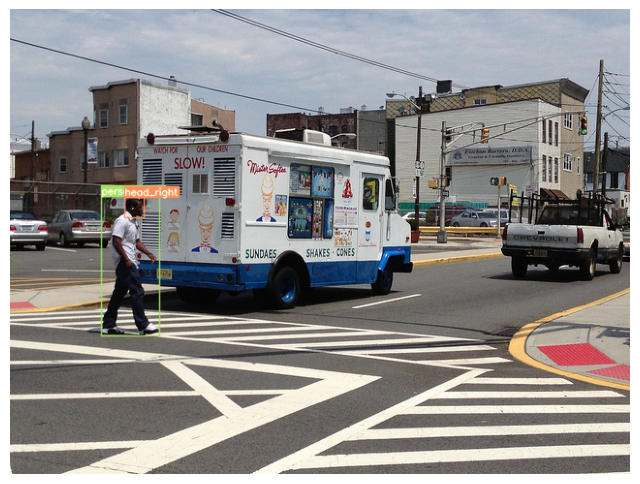

102411


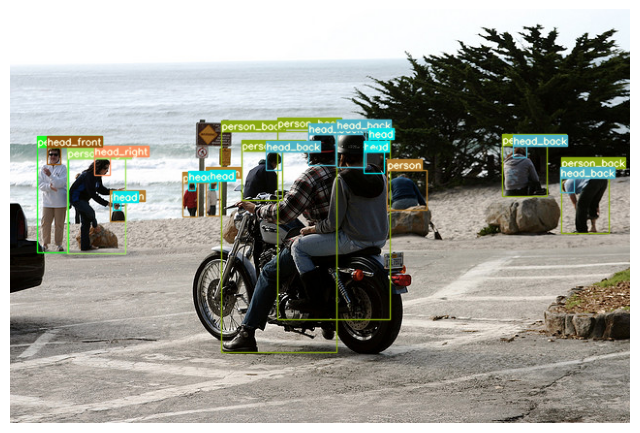

In [19]:
for image_id in list(ids)[:5]:
    print(image_id)
    # coco_set.print_image(image_id, classes=person_ids)
    coco_set.print_image(image_id, classes=[*person_ids, *head_ids])

## Save

## Export

In [20]:
# Define class to keep for export

classes = ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 
 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 
 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 
 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 
 'banana', 'apple', 'sandwich', 'orange', 'cake', 'chair', 
 'couch', 'potted plant', 'dining table', 'tv', 'laptop', 
 'mouse', 'remote', 'keyboard', 'cell phone', 'book', 
 'clock', 'vase']

person_ids = coco_set.get_super_category_ids('person')
person_classes = [coco_set.get_category(person_id)['name'] for person_id in person_ids]

head_ids = coco_set.get_super_category_ids('head')
head_classes = [coco_set.get_category(head_id)['name'] for head_id in head_ids]

classes = [*classes, *person_classes, *head_classes]

print(classes)

['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'cake', 'chair', 'couch', 'potted plant', 'dining table', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'book', 'clock', 'vase', 'person', 'person_front', 'person_back', 'person_right', 'person_left', 'head', 'head_front', 'head_back', 'head_right', 'head_left']


In [21]:
# Export the new dataset
# Use the information given in Classes list to update a data file in yolov7/data/

coco_set.export(classes)

The annotation directory (homemade/coco_body_head/labels/val2017) already exists, pls move or remove it before exporting this dataset.
